# Linear Regression HandsOn

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for label encoding
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../../data/new_insurance_data.csv')
data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [3]:
data.rename(columns={
    'Claim_Amount':'claimAmount',
    'past_consultations':'pastConsultations',
    'num_of_steps':'Nof_steps',
    'Hospital_expenditure':'hospitalExpenditure',
    'NUmber_of_past_hospitalizations':'Nof_hospitalizations',
    'Anual_Salary':'annualSalary'},inplace=True)
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'claimAmount',
       'pastConsultations', 'Nof_steps', 'hospitalExpenditure',
       'Nof_hospitalizations', 'annualSalary', 'region', 'charges'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1329 non-null   float64
 1   sex                   1338 non-null   object 
 2   bmi                   1335 non-null   float64
 3   children              1333 non-null   float64
 4   smoker                1338 non-null   object 
 5   claimAmount           1324 non-null   float64
 6   pastConsultations     1332 non-null   float64
 7   Nof_steps             1335 non-null   float64
 8   hospitalExpenditure   1334 non-null   float64
 9   Nof_hospitalizations  1336 non-null   float64
 10  annualSalary          1332 non-null   float64
 11  region                1338 non-null   object 
 12  charges               1338 non-null   float64
dtypes: float64(10), object(3)
memory usage: 136.0+ KB


#### We have 3 object columns with the following values
* **sex** -> male or female ('male', 'female')
* **smoker** -> is a smoker or not ('no', 'yes')
* **region** -> location in the US ('southeast', 'southwest', 'northwest', 'northeast')

The other columns are numeric

In [5]:
# cleaning the dataset of nulls and NaNs
data.isnull().sum()

age                      9
sex                      0
bmi                      3
children                 5
smoker                   0
claimAmount             14
pastConsultations        6
Nof_steps                3
hospitalExpenditure      4
Nof_hospitalizations     2
annualSalary             6
region                   0
charges                  0
dtype: int64

* We can drop NULLs/NaNs or impute appropriate value into them
* We typically drop when the number of error is small as compared to the dataset
* We replace/impute when the count of nulls is significant, and the spread is larger
* we will impute with:
    - mean/median if numeric 
    - mode if of object datatype

In [6]:
# analyzing the columns with missing values

# we will replace bmi, claimAmount, hospitalExpenditure and annual Salary with mean/median
# children, pastConsultations, Nof_steps and Nof_hospitalizations will be replace by the median or the mode

data.fillna(value={
    'age':data.age.mode()[0],
    'bmi':data.bmi.median(),
    'claimAmount':data.claimAmount.median(),
    'hospitalExpenditure':data.hospitalExpenditure.median(),
    'annualSalary':data.annualSalary.median(),
    'pastConsultations':data.pastConsultations.median(),
    'Nof_steps':data.Nof_steps.median(),
    'children':data.children.mode()[0],
    'Nof_hospitalizations':data.Nof_hospitalizations.mode()[0],
},inplace=True)
data.head()

,age,sex,bmi,children,smoker,claimAmount,pastConsultations,Nof_steps,hospitalExpenditure,Nof_hospitalizations,annualSalary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [7]:
data.isnull().sum()

age                     0
sex                     0
bmi                     0
children                0
smoker                  0
claimAmount             0
pastConsultations       0
Nof_steps               0
hospitalExpenditure     0
Nof_hospitalizations    0
annualSalary            0
region                  0
charges                 0
dtype: int64

#### dealing with duplicates
* duplicates are dropped using drop_duplicates()

In [8]:
data.duplicated().sum()

0

#### Dealing with Outliers using a boxplot
* Using a boxplot we can visually find the outliers for every column

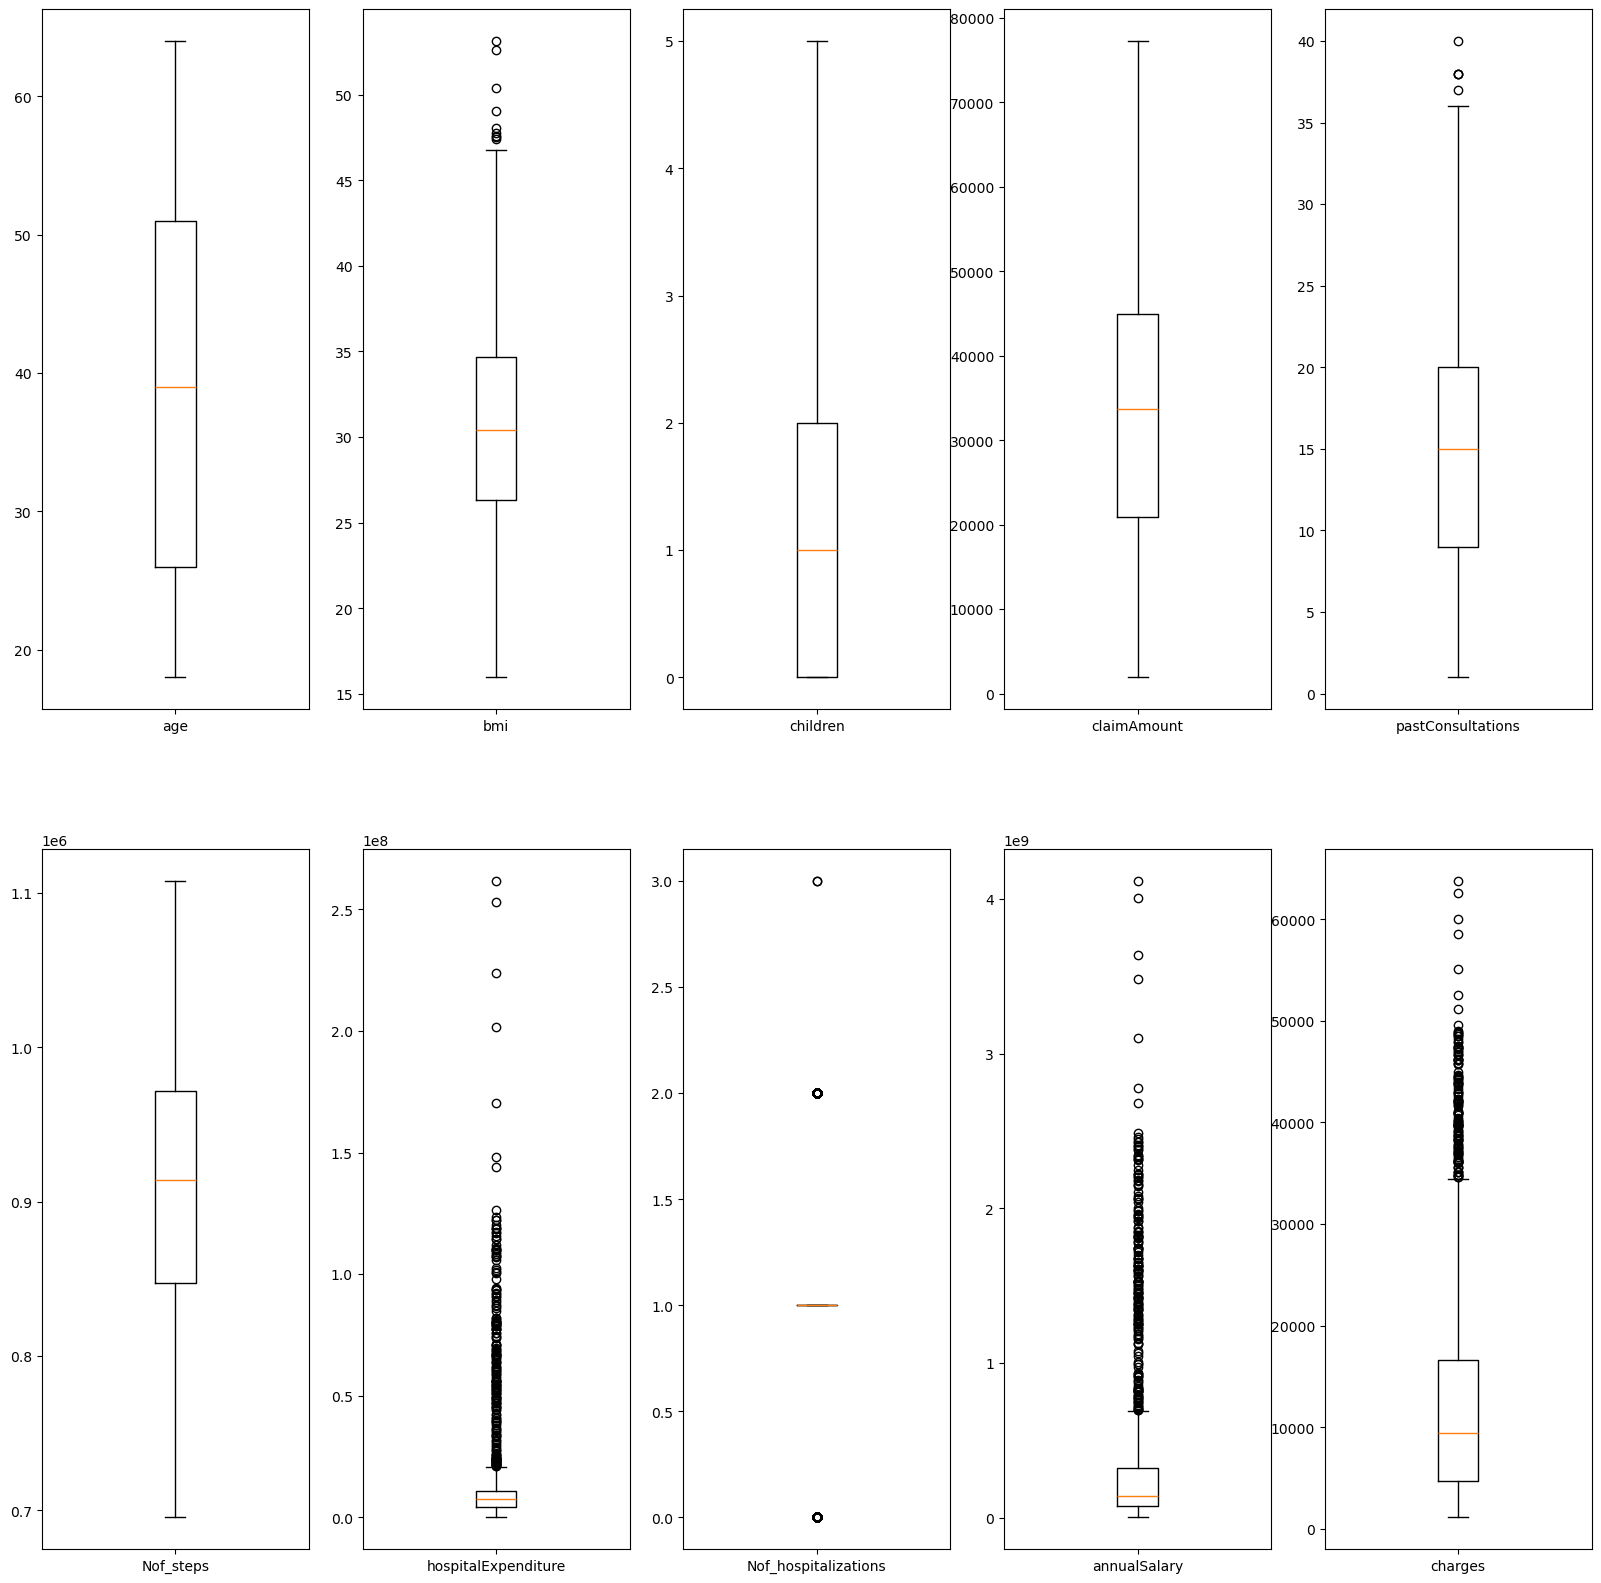

In [9]:
boxes = data.select_dtypes(include=np.number)

# a boxplot
plt.subplots(2,5,figsize=(20,20))
for i in range(len(boxes.columns.values)):
    plt.subplot(2,5,i+1)
    plt.boxplot(boxes.iloc[:,i])
    plt.xticks([1],[boxes.iloc[:,i].name])
plt.show()

In [179]:
# we will remove the values that exceed or fail to meet the outlier cutoffs
# we will ignore the outliers in the Nof_hospitalizations category
outliers_above = ['bmi','pastConsultations','hospitalExpenditure','annualSalary','charges'] #[9, 5, 202, 197, 139] Nof outliers

#creating an empty index
indx = pd.Index([])
for col in outliers_above:
    IQR = data[col].quantile(.75)-data[col].quantile(.25) #IQR
    idxt = data[data[col]>data[col].quantile(.75)+IQR*1.5].index
    indx = indx.union(idxt)
    
# print(indx.values)
data.drop(index=indx,inplace=True)
data.head()

,age,sex,bmi,children,smoker,claimAmount,pastConsultations,Nof_steps,hospitalExpenditure,Nof_hospitalizations,annualSalary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [10]:
data.shape

(1338, 13)

In [12]:
#creating dictionaries to use label encoding

# the columns
catcols = ['sex','smoker','region']

# the fit-transform dict
ft = {col: {catvar:label for label,catvar in enumerate(data[col].astype('category').cat.categories)} for col in catcols}

# the inverse-transform dict
it = {col: {value:key for key, value in ft[col].items()} for col in ft.keys()}

# label-encoding the data
for col in catcols:
    data.replace(ft[col],inplace=True)

#the data
data.head()

,age,sex,bmi,children,smoker,claimAmount,pastConsultations,Nof_steps,hospitalExpenditure,Nof_hospitalizations,annualSalary,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,2,1121.8739
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,2,1131.5066
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,2,1135.9407
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,2,1136.3994
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,2,1137.0110


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   float64
 1   sex                   1338 non-null   int64  
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   float64
 4   smoker                1338 non-null   int64  
 5   claimAmount           1338 non-null   float64
 6   pastConsultations     1338 non-null   float64
 7   Nof_steps             1338 non-null   float64
 8   hospitalExpenditure   1338 non-null   float64
 9   Nof_hospitalizations  1338 non-null   float64
 10  annualSalary          1338 non-null   float64
 11  region                1338 non-null   int64  
 12  charges               1338 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 136.0 KB


<Axes: >

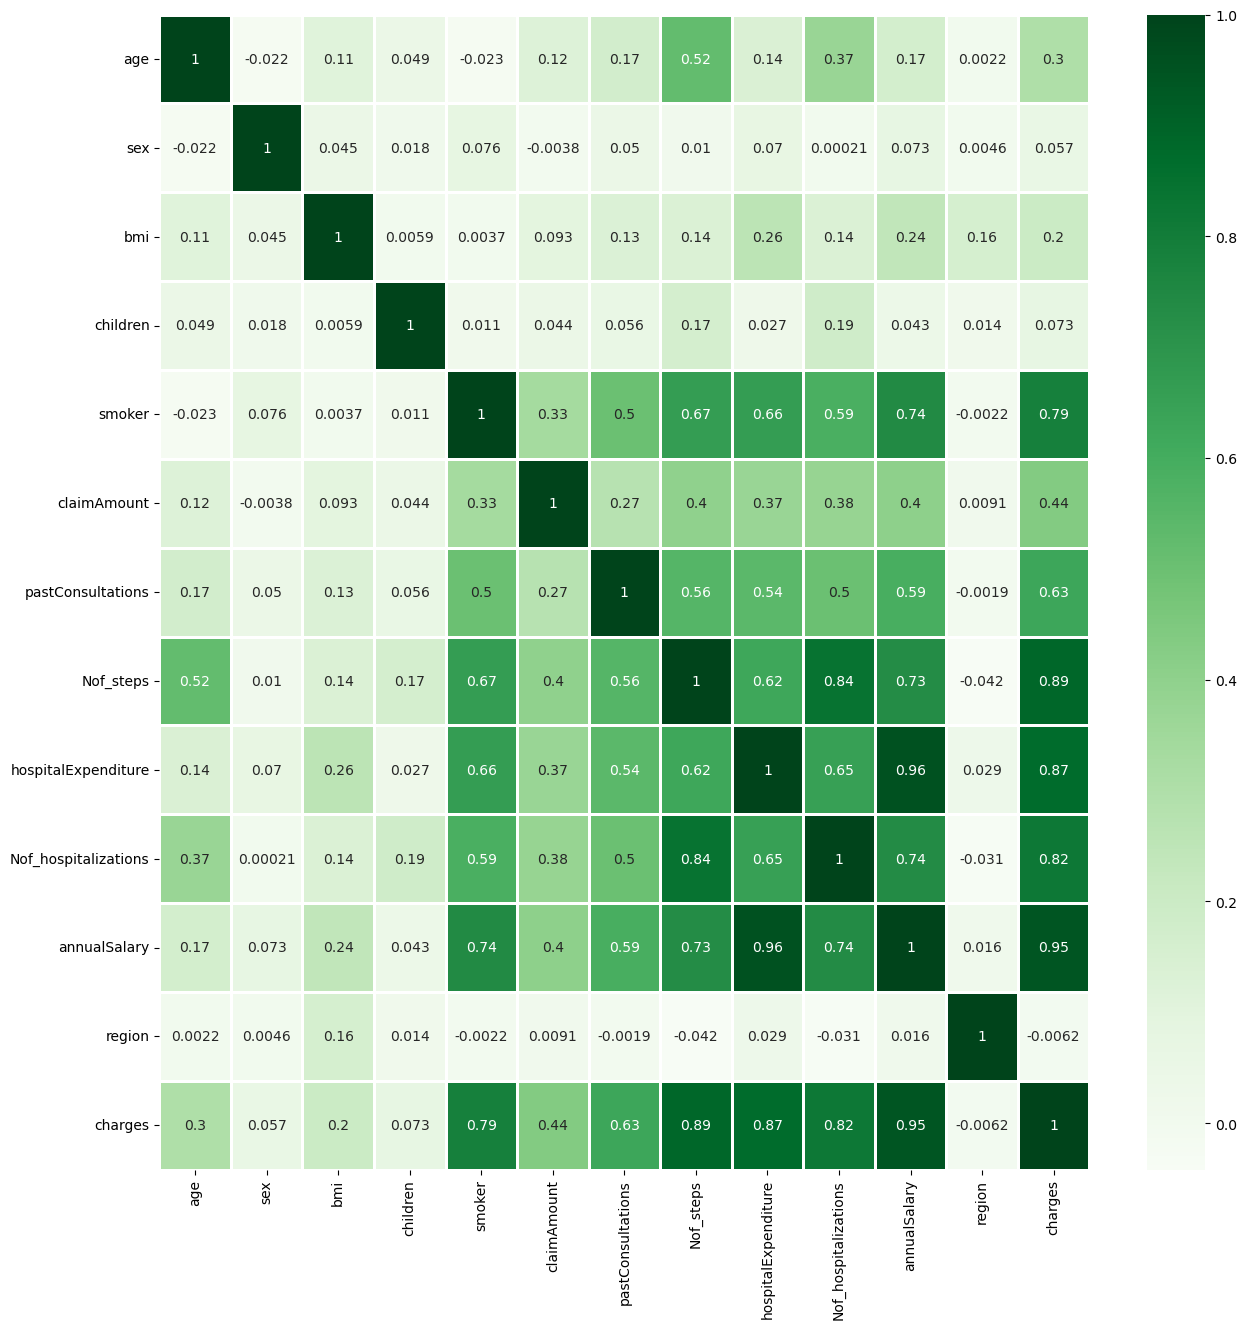

In [15]:
# selecting features for linear regression using the correlation matrix
cormat = data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(cormat,annot=True,linewidth=2,cmap='Greens')

## Building the Model

In [16]:
# select the independent and dependent data
x = data[['age','smoker','Nof_steps','Nof_hospitalizations','annualSalary']]
x.head()

,age,smoker,Nof_steps,Nof_hospitalizations,annualSalary
0,18.0,0,715428.0,0.0,55784970.05
1,18.0,0,699157.0,0.0,13700885.19
2,18.0,0,702341.0,0.0,73523107.27
3,18.0,0,700250.0,0.0,75819679.60
4,18.0,0,711584.0,0.0,23012320.01


In [17]:
# the dependent variable 'charges'
y = data.charges
y.head()

0    1121.8739
1    1131.5066
2    1135.9407
3    1136.3994
4    1137.0110
Name: charges, dtype: float64

In [19]:
# splitting into train and test data
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=45)
print(X_train.shape,X_test.shape)

(1070, 5) (268, 5)


## Implementing Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

LinRegMod = LinearRegression()

In [22]:
# training the model

LinRegMod.fit(X_train,y_train)

LinearRegression()

In [24]:
# Testing the model
y_pred = LinRegMod.predict(X_test)

In [26]:
# Evaluation metrics
# mostly sum of distance or ratio-of-distance based, like the R2 and RMSE metric
from sklearn.metrics import r2_score

In [27]:
# evaluating the predictions via the r2 score
r2_score(y_test,y_pred)

0.971529450491821

## Outcome
* The accuracy has comes out to 97.153% accuracy
* This is a very good score, and it is a result of picking excellent independent variables
* This model would be of great use to any insurance company trying to evaluate the charges